In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import extract_patches_2d

In [2]:
def normalize(tensor):
    tensor = tensor.copy().astype(np.float)
    tensor -= np.min(tensor)
    tensor /= np.max(tensor)
    return tensor

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'texture_based_segmentation.ipynb',
 'texture_based_segmentation_apply_model.ipynb',
 'texture_based_segmentation_models.ipynb',
 'texture_cnn_2_epochs.h5',
 'texture_datasets',
 'texture_samples']

In [4]:
cpg_folder = "../../../XRM/CPG200_PS239k_10min/"

In [5]:
tensor = np.load(os.path.join(cpg_folder, "cpg_rotated.npy"))

In [6]:
tensor = normalize(tensor)

In [7]:
image = tensor[300,200:800,:]

In [8]:
if True:
    from PIL import Image
    image = np.array(Image.open(os.path.join("texture_samples","2.png")))

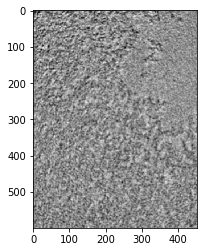

In [9]:
plt.imshow(image, cmap="gray")

In [10]:
#patches = extract_patches_2d(image, (50,50))

In [11]:
import keras
model = keras.models.load_model("texture_cnn_2_epochs.h5")

Using TensorFlow backend.


In [12]:
patch_width, patch_height = [50,50]
patches = extract_patches_2d(image, (patch_height, patch_width))

In [13]:
patches = np.expand_dims(patches, -1)

In [14]:
patches.shape

(222053, 50, 50, 1)

In [15]:
if False:
    res = model.predict(patches)

In [16]:
from skimage.util.shape import view_as_windows

In [54]:
import PIL
def label_image(model, image, stride=10, keep_size=True):
    windows = view_as_windows(normalize(image), (50,50))
    original_shape = (windows.shape[1],windows.shape[0])
    windows = windows[::stride,::stride]
    res = model.predict(np.reshape(windows,(windows.shape[0]*windows.shape[1],windows.shape[2], windows.shape[3], 1)))
    res = res.reshape((windows.shape[0], windows.shape[1]))
    if keep_size:
        res = np.array(Image.fromarray(res).resize(original_shape, PIL.Image.NEAREST))
    return res

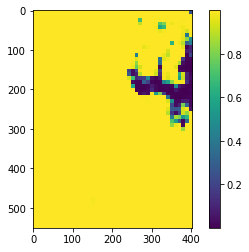

In [56]:
plt.imshow(label_image(model, image, 10, True))
plt.colorbar()

In [65]:
windows = view_as_windows(normalize(image), (50,50))
if True:
    windows = windows[::10,::10]
results = []
for y in range(windows.shape[0]):
    row = []
    print(".", end = "")
    for x in range(windows.shape[1]):
        im = np.expand_dims(np.array([windows[y,x]]), -1)
        row.append(model.predict(im))
    results.append(row)

........................................................

In [40]:
results = np.array(results)

In [41]:
results.shape

(56, 41, 1, 1)

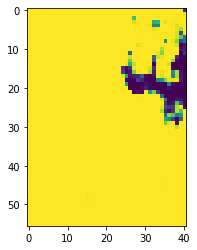

In [30]:
results = np.array(results)
plt.imshow(results[:,:,0,0])

In [31]:
#shape = [image.shape[0]-49,image.shape[1]-49, 50, 50]
#shape = [image.shape[0]-(patch_height-1),image.shape[1]-(patch_width-1), patch_height, patch_width]

In [32]:
shape = [image.shape[0]-(patch_height-1),image.shape[1]-(patch_width-1)]

In [35]:
res1 = np.fliplr(np.reshape(res, shape))

NameError: name 'res' is not defined

In [34]:
plt.imshow(res1>.001)

NameError: name 'res1' is not defined

In [82]:
from skimage.util.shape import view_as_windows